In [2]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import wavio

In [3]:
df = pd.read_csv("./data/train.csv")
example_id = df['example_id']
x = df['x']
y = df['TARGET']

In [4]:
df.head(10)

,example_id,x,TARGET
0,0,0.000,0.800000
1,1,0.001,0.800000
2,2,0.002,0.800000
3,3,0.003,0.799999
4,4,0.004,0.799998
5,5,0.005,0.799998
6,6,0.006,0.799996
7,7,0.007,0.799995
8,8,0.008,0.799994
9,9,0.009,0.799992


In [5]:
x.head(5)

0    0.000
1    0.001
2    0.002
3    0.003
4    0.004
Name: x, dtype: float64

error:0.06238291343449199 period:9.021745795966842 amplitude:0.9191485431648355 constant: 0.5323886554856507 
error:0.7262063279525033 period:38.49784915853956 amplitude:0.9707774279771515 constant: 0.5367622496464041 
error:0.799435818159931 period:137.46146031164605 amplitude:1.0197650961649822 constant: 0.549632699856437 
error:0.8908127570440746 period:467.77651574142385 amplitude:1.0076991163798736 constant: 0.5631213876054105 
error:0.9545076420181805 period:573.451851713601 amplitude:1.0254457253699962 constant: 0.5437116586264104 
error:1.0051776106390333 period:1125.5727768360873 amplitude:0.9912231039595528 constant: 0.5244553032657977 
error:0.6173544747976253 period:1018.8079518951845 amplitude:1.0135738494925304 constant: 0.5731893594787543 
error:0.8269750704109695 period:778.7433293067711 amplitude:1.067570549570948 constant: 0.6085418029923094 
error:0.9558465816646711 period:328.965948878667 amplitude:1.0553645819461501 constant: 0.6424936480519317 
error:0.85271279690

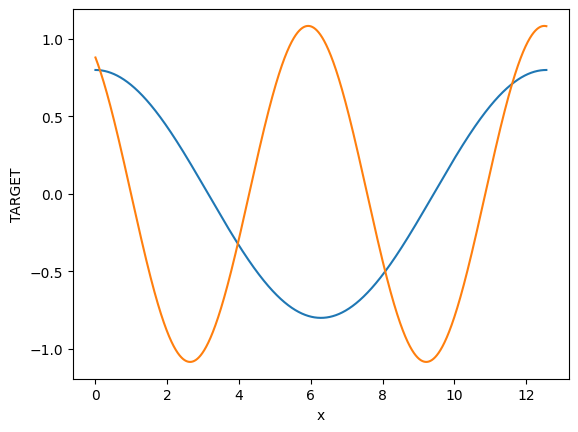

error:1.047714195382427 period:530.5598507716952 amplitude:1.1376999862510042 constant: 0.6306196364502823 
error:0.963507610920462 period:494.775254031501 amplitude:1.1914395759193548 constant: 0.5370892944007538 
error:1.0381138259067106 period:587.1753670109665 amplitude:1.2020373087017664 constant: 0.5017940551620778 
error:1.0763542933447119 period:661.6221453235478 amplitude:1.193701191636445 constant: 0.5087987654027712 
error:1.0559321069985 period:883.5734019018588 amplitude:1.2195988780480862 constant: 0.47119440361030157 
error:1.0860274596732404 period:861.3528303553121 amplitude:1.21573511392292 constant: 0.43062102921044787 
error:1.2165986664192865 period:269.2800740790059 amplitude:1.2326861272308958 constant: 0.46655399016503635 
error:0.9482083812666298 period:-35.040136061969065 amplitude:1.2212653118103902 constant: 0.4368376777827542 
error:1.1798952398131193 period:316.22498972874206 amplitude:1.1199110945541835 constant: 0.43749424301482276 
error:0.9326066329802

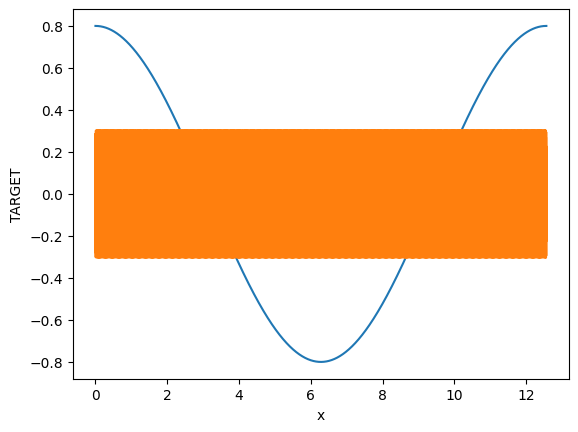

error:0.3665910478842622 period:-2637.6776704703516 amplitude:0.2975422912972245 constant: 0.34874448914030737 
error:0.3425522438021125 period:-2674.1317870291173 amplitude:0.2839283313186428 constant: 0.35211444380893214 
error:0.3426465429701777 period:-2677.3412678963273 amplitude:0.27667388197579273 constant: 0.3494529072639334 
error:0.42074227526993907 period:-2673.3677074187517 amplitude:0.2868583729522288 constant: 0.34702669946453885 
error:0.36870792116680073 period:-2682.3000280003503 amplitude:0.27821045317523235 constant: 0.3491365975896846 
error:0.3681411181736431 period:-2734.9394927646617 amplitude:0.2649509867296821 constant: 0.3494468340828006 
error:0.3533974949455637 period:-2707.792040875173 amplitude:0.2731971313967117 constant: 0.34870450676505643 
error:0.37956121805149917 period:-2761.6183046807705 amplitude:0.29173033559338435 constant: 0.35129143865358076 
error:0.40322836504927545 period:-2821.978866113334 amplitude:0.2850018575180423 constant: 0.353371558

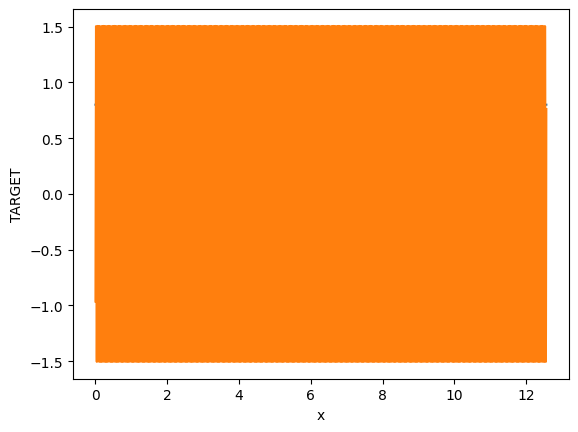

error:1.7102119847132693 period:-7255.880301060638 amplitude:1.4899462953173248 constant: -3.925282393494224 
error:1.6102926147177445 period:-8048.764577124957 amplitude:1.437052248741185 constant: -4.033748340617975 
error:1.2013610802269115 period:-8257.653773045988 amplitude:1.430886480389256 constant: -3.9822919690332617 
error:1.1673670093235993 period:-8920.971984247619 amplitude:1.423225184484285 constant: -3.9133731206023965 
error:1.2932046062065587 period:-8822.322486049821 amplitude:1.4276340530022849 constant: -3.8163251629057124 
error:1.4105797690128228 period:-8909.696226913915 amplitude:1.3454061410680556 constant: -3.816816592359571 
error:1.0882970964073408 period:-8672.500447632154 amplitude:1.3634437906362864 constant: -3.7498896013027925 
error:1.1602338525953468 period:-9109.714788177092 amplitude:1.353912231916825 constant: -3.857306727016693 
error:1.2682225697283789 period:-9721.784961742851 amplitude:1.3512249755274426 constant: -3.7888539102244576 
error:1.2

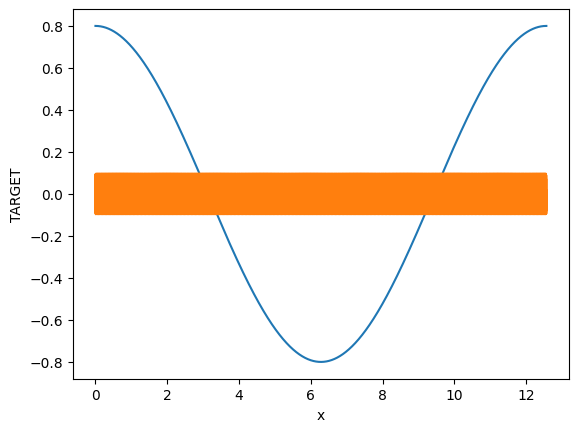

error:0.3430641552443579 period:-7763.906738556169 amplitude:0.09086066119088873 constant: -2.318389259915332 
error:0.27721502442768864 period:-7749.444172882401 amplitude:0.09259598201831015 constant: -2.3192687152490734 
error:0.3240319713923951 period:-7751.589519131352 amplitude:0.07586316699226064 constant: -2.3200698890094436 
error:0.31803941958620496 period:-7757.423645315642 amplitude:0.08001212962863859 constant: -2.320195009824775 
error:0.3379672979974028 period:-7753.1079520908015 amplitude:0.0794421926533098 constant: -2.3193128187810053 
error:0.3440132966420391 period:-7749.220153743578 amplitude:0.0833116233476468 constant: -2.3195463780732184 
error:0.3504911132405974 period:-7747.750547299975 amplitude:0.07430006377099758 constant: -2.3195753640167416 
error:0.3472164946340605 period:-7736.646810570429 amplitude:0.06813170691127275 constant: -2.320528185173726 
error:0.32741497954357734 period:-7724.353843408212 amplitude:0.06791186646301925 constant: -2.32054268330

In [25]:
def y_predict(a,b,c,d,x):
    return a * math.cos(b*x + c) + d

lr = 0.005
n = len(x)
batch = 100
epochs = 5000

rsl = []
a = random.random()
b = random.random()
c = random.random()
d = 0
for i in range(epochs):
    a_gradiente = 0
    b_gradiente = 0
    c_gradiente = 0
    d_gradiente = 0
    e = 0

    if i == 10 or i == 400 or i == 1000 or i == 4000:
        data_yhat = []
        a_final = rsl[-1][0]
        b_final = rsl[-1][1]
        c_final = rsl[-1][2]
        for value in x:
            data_yhat.append(y_predict(a_final, b_final, c_final, d, value))
        plt.plot(x,y,label="Datos Originales")
        plt.plot(x, data_yhat, label="Datos a Predecir")
        plt.xlabel("x")
        plt.ylabel("TARGET")
        plt.show()
    for m in range(batch):
        ix = int(random.uniform(0,n))
        e +=  (y[ix] - y_predict(a,b,c,d,x[ix]))* (y[ix] - y_predict(a,b,c,d,x[ix]))
        a_gradiente += -2*e*math.cos(b*ix+c)
        b_gradiente += 2*e*a*math.sin(b*ix+c)*ix
        c_gradiente += 2*e*a*math.sin(b*ix*c)

    a = a - lr * a_gradiente/batch
    b = b - lr * b_gradiente/batch
    c = c - lr * c_gradiente/batch

    e = e/batch
    rsl.append([a,b,c,d,e])
    print(f"error:{e} period:{b} amplitude:{a} constant: {c} ")


In [69]:
x_min = x.min().min()
long_s = [ y_predict(a,b,c,d,xi) for xi in np.arange(x_min , 20*math.pi, 0.001).astype(np.float32)]
long_s

[0.6545291131098716,
 0.6545086162748491,
 0.6544879202217102,
 0.6544670249591983,
 0.6544459304863411,
 0.6544246368243635,
 0.6544031439599152,
 0.6543814519094074,
 0.6543595606794429,
 0.6543374702973509,
 0.6543151807287085,
 0.654292692000781,
 0.6542700041204131,
 0.6542471170945109,
 0.6542240309300403,
 0.6542007456558074,
 0.6541772612135631,
 0.654153577675792,
 0.6541296950725944,
 0.6541056133222698,
 0.6540813324764477,
 0.6540568525425187,
 0.6540321735279339,
 0.6540072954402049,
 0.6539822182869043,
 0.6539569420756649,
 0.6539314668141802,
 0.6539057925102044,
 0.6538799191715522,
 0.6538538468548478,
 0.6538275754708999,
 0.6538011050760831,
 0.6537744356285935,
 0.6537475672861315,
 0.6537204998566902,
 0.653693233550176,
 0.6536657682744248,
 0.6536381039343686,
 0.6536102407445425,
 0.6535821785058303,
 0.6535539174358531,
 0.6535254573326511,
 0.6534967984169309,
 0.6534679404838897,
 0.6534388837573191,
 0.6534096280295735,
 0.6533801735275295,
 0.6533505201515

In [70]:
sd.play(long_s)

In [71]:
sd.play(long_s,44100)
sd.wait()
wavio.write("./data/sound_prediccion.wav",long_s,44100,sampwidth=3)

In [72]:
data_test = pd.read_csv("./data/test.csv")
x_test = data_test['x']
data_predicts = []
for value in x_test:
    data_predicts.append(y_predict(a_final,b_final,c_final,d,value))

In [73]:
example_id = data_test['example_id']
df_sound = pd.DataFrame(data= zip(example_id, data_predicts),
                      columns=["example_id","TARGET"])
df_sound.to_csv("./data/prediction_sound_best2.csv", index=False)